# Continuous Glucose Monitoring Data Analysis Using *glucoCheck* Package

To begin with you will have to check if **python** and all the relevant packages are installed on your machine.
Detailed list, including how to install, can be accessed from the documentation page : https://snehg0205.github.io/index.html#chp1

The *glucoCheck* package can be downloaded from: XXXXXXXXXXXXXXXXXXXXXX, which will have to be explicitly imported.
Below we will be using publically available dataset from Hall et al. paper ( https://doi.org/10.1371/journal.pbio.2005143 ). Continuous glucose monitoring (CGM) data consists of 105426 glucose reading taken every 5min across 57 individuals, for convenience this data is readily available as part of the *glucoCheck* package. Otherwise you can load your data directly from your machine.

In [1]:

from GlucoCheck.glucoCheck import glucoCheckOps
import pandas as pd

glucoCheckObject = glucoCheckOps()


Using TensorFlow backend.


Object Created!


### Reading-in data
The following command illustrates how to extract the Hall dataset from the package

In [2]:
data = glucoCheckObject.hall_data
data.head()

,subjectId,Display Time,GlucoseValue
0,1636-69-001,2/3/14 03:42,93
1,1636-69-001,2/3/14 03:47,93
2,1636-69-001,2/3/14 03:52,93
3,1636-69-001,2/3/14 03:57,95
4,1636-69-001,2/3/14 04:02,96


To see all the unique subject IDs of the individuals in our data, use the following command:

In [3]:
print(data.subjectId.unique()) #improve how it looks

['1636-69-001' '1636-69-026' '1636-69-028' '1636-69-032' '1636-69-035'
 '1636-69-048' '1636-69-053' '1636-69-060' '1636-69-064' '1636-69-069'
 '1636-69-090' '1636-69-091' '1636-69-100' '1636-69-104' '1636-69-107'
 '1636-69-111' '1636-69-114' '1636-69-123' '1636-70-1002' '1636-70-1003'
 '1636-70-1005' '1636-70-1008' '1636-70-1010' '2133-001' '2133-002'
 '2133-003' '2133-004' '2133-006' '2133-007' '2133-008' '2133-009'
 '2133-010' '2133-011' '2133-012' '2133-013' '2133-015' '2133-017'
 '2133-018' '2133-019' '2133-020' '2133-021' '2133-022' '2133-023'
 '2133-024' '2133-025' '2133-026' '2133-027' '2133-028' '2133-030'
 '2133-032' '2133-033' '2133-035' '2133-036' '2133-037' '2133-039'
 '2133-040' '2133-041']


In [6]:
data[data['subjectId']=='2133-019']

,subjectId,Display Time,GlucoseValue
70373,2133-019,3/15/17 16:37,120
70374,2133-019,3/15/17 16:42,121
70375,2133-019,3/15/17 16:47,124
70376,2133-019,3/15/17 16:52,123
70377,2133-019,3/15/17 16:57,115
...,...,...,...
72169,2133-019,3/24/17 20:52,77
72170,2133-019,3/24/17 20:57,75
72171,2133-019,3/24/17 21:02,71
72172,2133-019,3/24/17 21:07,68


To visualize any of the above individuals, set the subject ID in the quotes below

Displaying for all days 


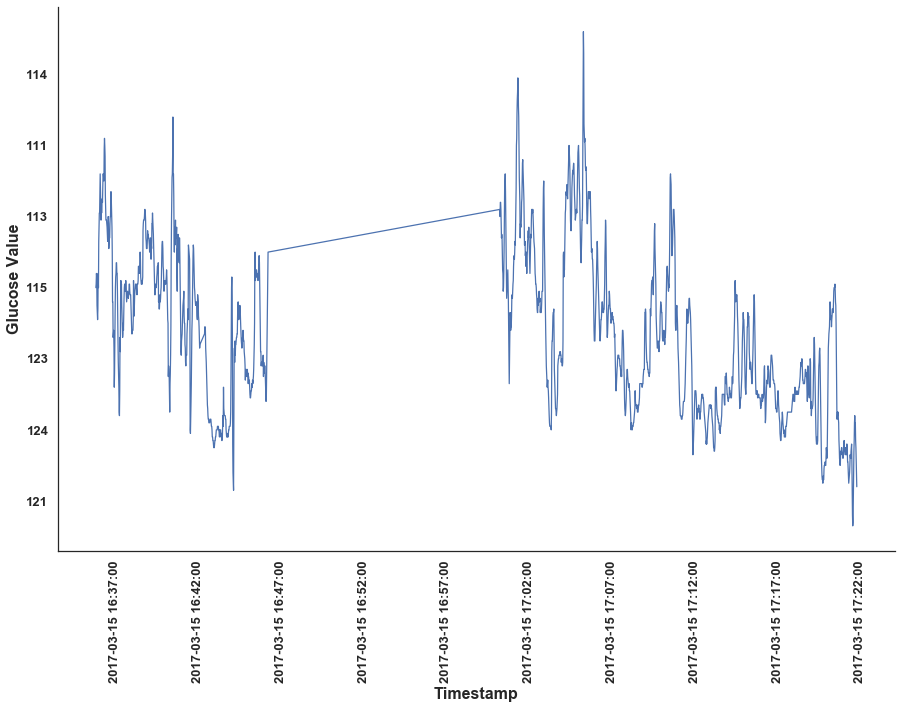

In [9]:
glucoCheckObject.plotIndividual('2133-019',None,data)

Displaying for day: 2017-03-15


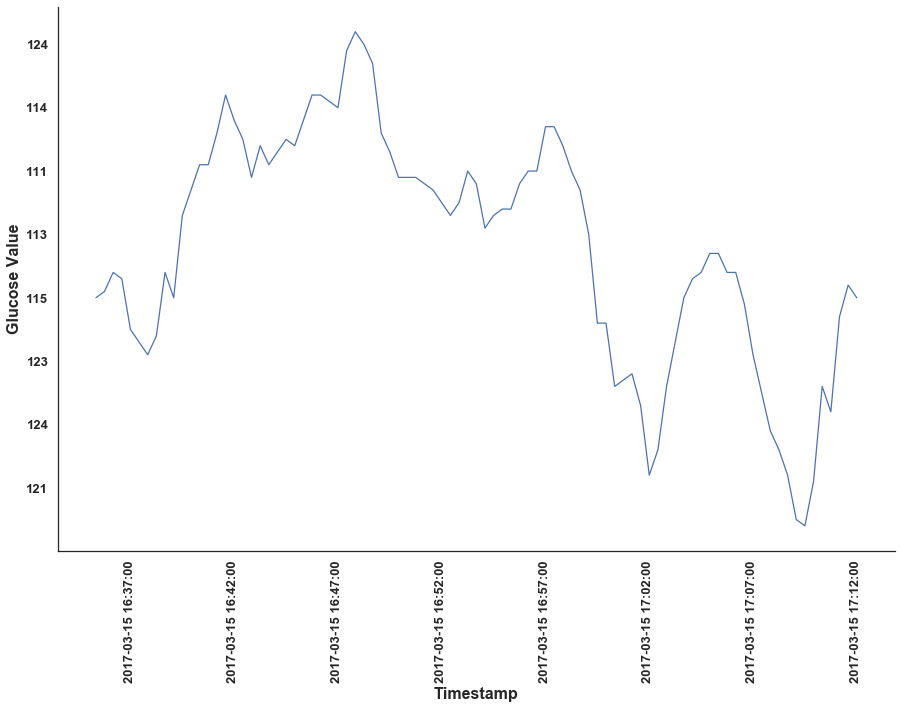

In [10]:
glucoCheckObject.plotIndividual('2133-019', '2017-03-15', data)

### Initial data inspection and visualisation
To understand the overall data quality we need to inspect the data, this will help with data quality control. By typing the following comand we will get the table with few measures of data "goodness":

In [11]:
xx = glucoCheckObject.dataDescribe(data)

In [12]:
display(xx) 
# rename columns so they look better

,Subject ID,Start,End,# of readings,# of Days,Timestamp Days,# of Missing Values,Percent of missing values,Average gap size,Max. Glucose Value,Min. Glucose Value,Mean Glucose Value
0,2133-041,2017-07-03 18:32:00,2017-07-11 20:41:00,1858,8.08,8 days 02:04:00,490,21.04,28.823529,204,51,108.560
1,2133-040,2017-06-28 13:34:00,2017-07-05 00:19:00,1792,6.42,6 days 10:40:00,100,5.39,2.941176,171,59,92.585
2,2133-039,2017-06-05 12:23:00,2017-06-14 13:57:00,2013,9.04,9 days 01:29:00,733,28.09,5.511278,204,50,103.922
3,2133-037,2017-06-05 14:11:00,2017-06-11 21:50:00,1785,6.29,6 days 07:34:00,57,3.13,2.714286,153,48,92.966
4,2133-036,2017-06-01 15:26:00,2017-06-10 06:31:00,1954,8.62,8 days 15:00:00,651,26.21,5.470588,214,58,107.529
5,2133-035,2017-06-01 17:17:00,2017-06-08 23:06:00,1830,7.21,7 days 05:44:00,327,15.68,4.808824,190,47,101.771
6,2133-033,2017-05-19 12:58:00,2017-05-26 20:02:00,1892,7.25,7 days 06:59:00,237,11.29,8.777778,161,49,92.981
7,2133-032,2017-05-19 13:31:00,2017-05-25 18:05:00,1781,6.17,6 days 04:29:00,8,0.45,1.600000,147,69,99.475
8,2133-030,2017-05-03 14:13:00,2017-05-10 08:57:00,1818,6.75,6 days 18:39:00,144,7.38,18.000000,147,41,93.200
9,2133-028,2017-05-10 00:03:00,2017-05-17 02:08:00,1850,7.08,7 days 02:00:00,195,9.56,65.000000,111,45,74.790


In [13]:
# To save the above table as a csv, use the following command:
xx.to_csv('~/Desktop/Data_Description.csv')
# Don't forget to replace the above path with your own absolute path

In [14]:
# view the first 5 rows (individuals) of the data description
xx.head(5)

,Subject ID,Start,End,# of readings,# of Days,Timestamp Days,# of Missing Values,Percent of missing values,Average gap size,Max. Glucose Value,Min. Glucose Value,Mean Glucose Value
0,2133-041,2017-07-03 18:32:00,2017-07-11 20:41:00,1858,8.08,8 days 02:04:00,490,21.04,28.823529,204,51,108.560
1,2133-040,2017-06-28 13:34:00,2017-07-05 00:19:00,1792,6.42,6 days 10:40:00,100,5.39,2.941176,171,59,92.585
2,2133-039,2017-06-05 12:23:00,2017-06-14 13:57:00,2013,9.04,9 days 01:29:00,733,28.09,5.511278,204,50,103.922
3,2133-037,2017-06-05 14:11:00,2017-06-11 21:50:00,1785,6.29,6 days 07:34:00,57,3.13,2.714286,153,48,92.966
4,2133-036,2017-06-01 15:26:00,2017-06-10 06:31:00,1954,8.62,8 days 15:00:00,651,26.21,5.470588,214,58,107.529


In [15]:
# to sort the data description table by any column, set the column name in the quotes below
xx.sort_values('# of readings')

,Subject ID,Start,End,# of readings,# of Days,Timestamp Days,# of Missing Values,Percent of missing values,Average gap size,Max. Glucose Value,Min. Glucose Value,Mean Glucose Value
18,2133-019-2,2017-03-15 16:37:00,2017-03-17 18:32:00,580,2.04,2 days 01:50:00,24,4.01,6.000000,168,63,112.050
59,1636-69-001,2014-02-03 03:42:00,2014-02-05 18:31:00,754,2.58,2 days 14:44:00,3,0.40,1.500000,225,68,102.183
45,1636-69-104,2015-08-05 14:46:00,2015-08-11 05:46:00,969,5.58,5 days 14:55:00,727,44.90,9.693333,152,61,94.121
58,1636-69-001-2,2015-03-29 11:53:00,2015-04-02 15:08:00,1092,4.12,4 days 03:10:00,105,8.82,21.000000,250,64,112.403
44,1636-69-104-2,2016-02-17 00:20:00,2016-02-23 09:10:00,1153,6.33,6 days 08:45:00,768,41.90,8.930233,140,46,84.042
19,2133-019,2017-03-20 13:42:00,2017-03-24 21:12:00,1221,4.29,4 days 07:25:00,37,2.98,2.466667,192,53,104.200
35,1636-70-1010,2016-05-25 10:38:00,2016-05-30 12:43:00,1393,5.08,5 days 02:00:00,88,6.01,5.866667,186,75,119.359
56,1636-69-028,2015-04-02 13:33:00,2015-04-08 09:32:00,1543,5.79,5 days 19:54:00,163,9.71,6.791667,168,75,109.925
50,1636-69-064,2015-03-26 14:49:00,2015-04-01 07:04:00,1584,5.67,5 days 16:10:00,75,4.59,3.260870,218,43,116.333
49,1636-69-069,2015-07-20 13:33:00,2015-07-27 10:12:00,1591,6.83,6 days 20:34:00,436,22.08,8.720000,187,69,107.872


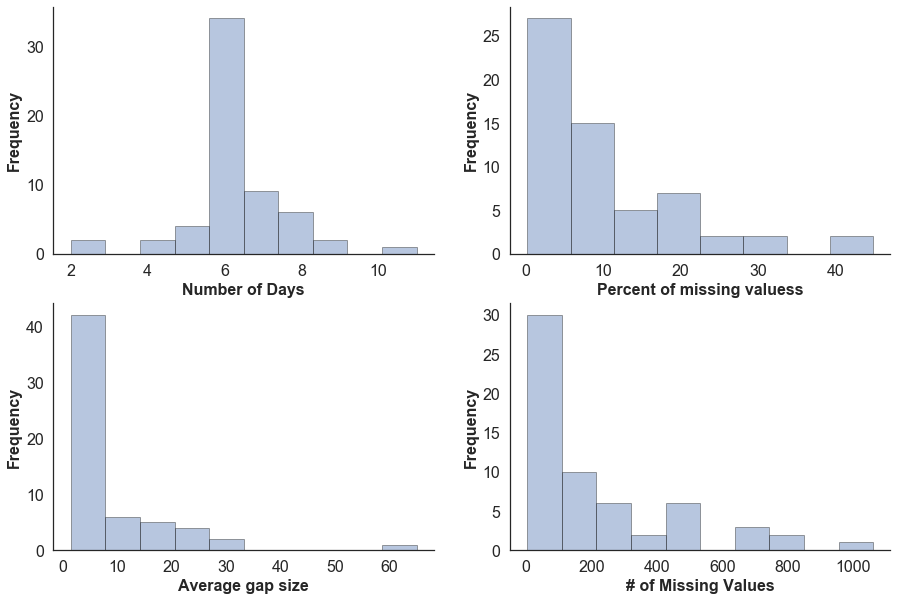

In [10]:
# view collective histograms
glucoCheckObject.histograms(xx)

#### To view the data in an individual column, set the column name below

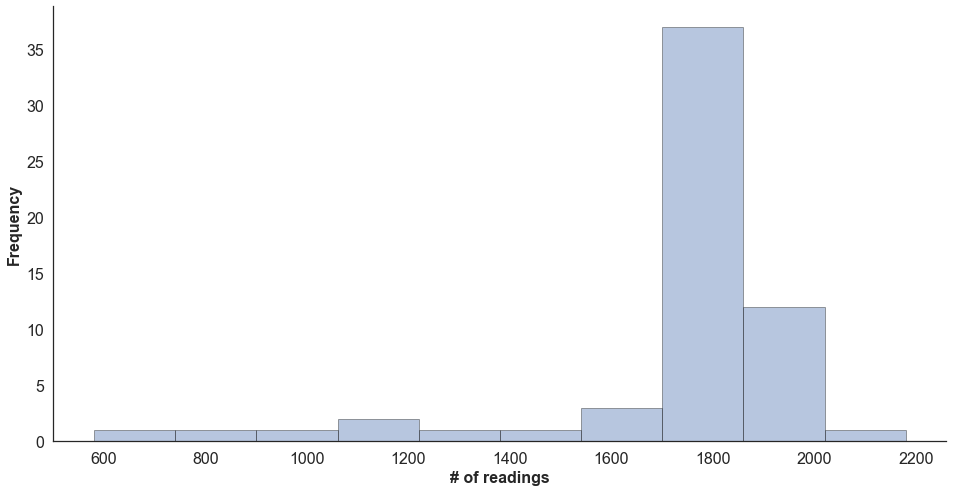

In [11]:
glucoCheckObject.barPlot(xx, '# of readings')

### Calculating the variability indices
We calculate the following variability indices for all individuals:
- ADRR
- BGRI
- CONGAn
- Distance Travelled
- Estimated hbA1c
- GFI
- GLI
- GMI
- GRADE
- GVP
- IGC
- J - Index
- LAGE
- M - Value
- MAD
- MAG
- MAGE
- MODD
- PGS
- SD of ROC
- Summary Statistics
- Time in Range
- Variability Episodes



In [12]:
glucoCheckObject.gvIndices(data)
# rename columns

,ADDR,BGRI,LBGI,HBGI,CONGA1,CONGA2,CONGA4,DT,HBA1C,GFI,...,IQR,MAX,MIN,TAR_VH(%),TAR_H(%),TIR(%),TBR_L(%),TBR_VL(%),Hypoglycemic Episodes,Hyperglycemic Episodes
Subject ID,,,,,,,,,,,,,,,,,,,,,
1636-69-001,24.63,2.74,1.52,1.23,37.66,51.23,44.12,871.0,5.36,4.61,...,27.50,225,70,0.000,6.969,93.031,0.000,0.000,0,0
1636-69-001-2,13.29,1.14,0.48,0.66,8.42,11.19,8.74,2351.0,5.64,4.22,...,27.00,181,64,0.000,0.122,99.755,0.122,0.000,0,0
1636-69-026,11.54,0.96,0.36,0.60,3.88,4.15,3.65,4254.0,5.65,4.89,...,25.00,182,62,0.000,0.134,99.665,0.201,0.000,0,0
1636-69-028,7.27,0.93,0.64,0.29,2.90,3.39,4.35,3417.0,5.41,3.89,...,24.00,168,75,0.000,0.000,100.000,0.000,0.000,0,0
1636-69-032,7.21,0.74,0.60,0.14,2.67,3.53,3.82,3986.0,5.36,4.03,...,19.00,156,67,0.000,0.000,99.931,0.069,0.000,0,0
1636-69-035,10.71,1.44,0.63,0.81,1.76,2.76,2.77,4667.0,5.65,5.30,...,33.00,194,69,0.000,0.414,99.379,0.207,0.000,0,0
1636-69-048,8.89,1.44,1.42,0.02,2.78,3.44,3.94,3425.0,5.00,3.37,...,16.50,136,63,0.000,0.000,99.233,0.767,0.000,0,0
1636-69-053,12.16,1.50,1.26,0.24,3.32,4.00,4.26,3503.0,5.12,3.50,...,17.00,183,66,0.000,0.122,99.512,0.366,0.000,0,0
1636-69-060,5.82,0.87,0.08,0.79,2.42,2.76,2.92,3636.0,5.94,3.47,...,20.00,181,91,0.000,0.061,99.939,0.000,0.000,0,0


### Training the model

Training the model on the preloaded dataset (described above)



In [13]:
glucoCheckObject.train()

Model trained successfully!


### Reading the test file

In [14]:
testdatafile = pd.read_csv("~/Desktop/NCSA_genomics/testing_file.csv")

### Imputing the data

In [15]:
glucoCheckObject.impute(testdatafile)

,subjectId,Display Time,GlucoseValue
0,1636-69-032,1/13/16 12:58,122
1,1636-69-032,1/13/16 13:03,123
2,1636-69-032,1/13/16 13:08,124
3,1636-69-032,1/13/16 13:13,128
4,1636-69-032,1/13/16 13:18,133
...,...,...,...
1778,1636-69-032,1/19/16 17:12,186
1779,1636-69-032,1/19/16 17:17,0
1780,1636-69-032,1/19/16 17:22,101
1781,1636-69-032,1/19/16 17:27,106
